In [1]:
from sympy import *
from gravipy import *
from gravipy.tensorial import *
import numpy as np
import sympy as sy
import scipy 
import matplotlib.pyplot as plt

In [2]:
init_printing()    #para que imprima bonito las integrales

# Tarea 9.

# 1. Spherically-symmetric metric

### $ds^2=-e^{2F(r,t)}dt^2+e^{2H(r,t)}dr^2+r^2(d\theta^2+sin^2\theta d\phi^2)$

In [102]:
t, r, theta, phi = symbols('t r \\theta \\phi') 

F=Function('F')
H=Function('H')

x1 = Coordinates('\chi', [t, r, theta,phi]) #chi depende de t r theta y phi

metric = diag(-exp(2*F(r,t)),exp(2*H(r,t)),r**2,r**2*sin(theta)**2)

g = MetricTensor('g', x1, metric) #nombre de la metrica, coordenadas y la metrica

Nuestras coordenadas:

In [103]:
x1(-All)

El tensor métrico:

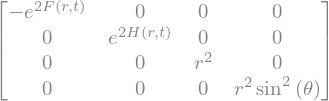

In [104]:
g(All,All)

Calculamos implicitamente los símbolos de Christoffel, tensores de Riemann y Ricci...

In [105]:
Gamma = Christoffel('Gamma', g)
#Gamma(-All, All, All)   

Rm = Riemann('Rm', g)
#Rm(-All,All,All,All) 

Ri = Ricci('Ri', g)
#Ri(All,All)

Y el tensor de Einstein en su forma matricial es:

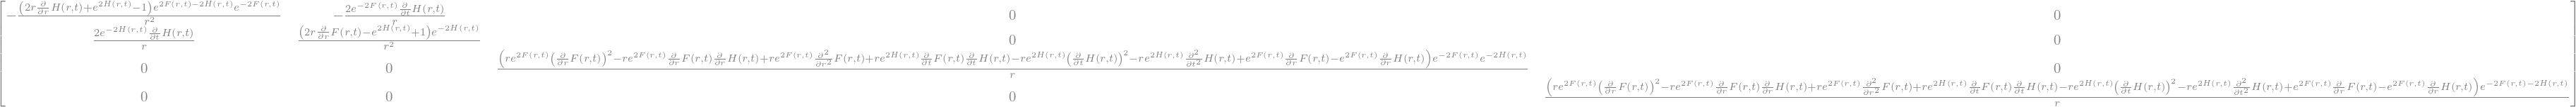

In [107]:
G = Einstein('G', Ri)   #Tensor de Einstein
G(-All,All)

## La componente $G_{00}$:

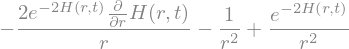

In [9]:
expand(G(-1,1))
#simplify(G(-1,1))

Que podemos expresar de forma más compacta si escribimos las derivadas espaciales ($\partial/\partial{r}$) con comillas, entonces:

### $G_{00}=-e^{-2H} \left(\frac{2}{r}H^\prime - \frac{1}{r^2} \right) - \frac{1}{r^2} $

Nota al pie: vemos que hay dos signos diferentes con respecto a la respuesta propuesta en la tarea

## La componente $G_{11}$:

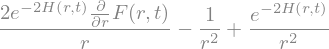

In [10]:
expand(G(-2,2))

### $G_{11}=e^{-2H} \left(\frac{2}{r}F^\prime + \frac{1}{r^2} \right) - \frac{1}{r^2} $

## La componente $G_{22}$:

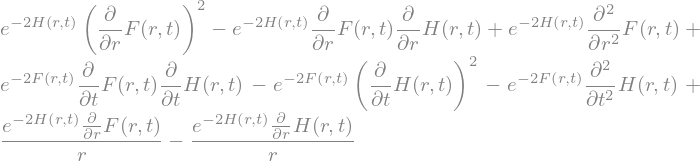

In [11]:
simplify(G(-3,3))

## Y la componente $G_{33}$:

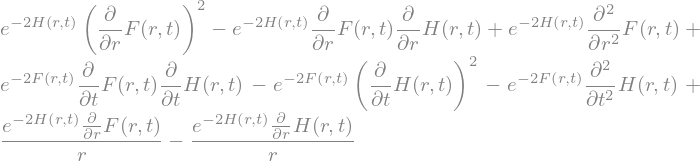

In [12]:
simplify(G(-4,4))

In [14]:
sy.simplify(G(-4,4) - G(-3,3))

Es evidente que ambas componentes son iguales. Ya que simpy no logra simplificar más las expresiones anteriores, las podemos reducir a mano:

### $G_{22}=G_{33}= e^{-2H} \left( (F^\prime)^2 - F^\prime H^\prime + F^{\prime\prime} + \frac{1}{r}(F^\prime-H^\prime) \right) + e^{-2F} \left( F^\prime H^\prime - (H^\prime)^2 - H^{\prime\prime} \right) $

## Finalmente, las componentes $G_{01}$ y $G_{10}$:

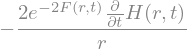

In [15]:
simplify(G(-1,2))   #G_{01}

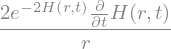

In [16]:
simplify(G(-2,1))   #G_{10}

En este caso, escribiendo la derivada temporal con un punto obtenemos:

### $G_{01}=-\frac{2}{r} e^{-2F} \dot{H}$ y

### $G_{10}=-\frac{2}{r} e^{-2H} \dot{H}$ 

Es evidente que $G_{01}\neq G_{10}$, a diferencia de lo que propone la tarea. Considero que, tomando en cuenta que en la componente $G_{00}$ también hay dos signos volteados, ésto podría ser señal de que hay algún signo mal puesto en la métrica propuesta. Revisé minuciosamente y mi métrica es idéntica a la propuesta por la tarea, por más que traté de cambiar signos, no encontré cuál podría estar generando esta discrepancia.

# 2. Bianchi Models

Métrica Bianchi tipo III

### $$ds^2=dt^2-A(t)^2dx^2-B(t)^2e^{-2\alpha x}dy^2-C(t)^2dz^2$$

In [34]:
#coordinates
t,x,y,z,alpha = sy.symbols('t x y z \\alpha')

#scale-factors
A = sy.Function('A')
B = sy.Function('B')
C = sy.Function('C')

x2 = Coordinates('x2',[t,x,y,z])
metric2 = diag(1,-A(t)**2,-B(t)**2*sy.exp(-2*alfa*x),-C(t)**2)
g2 = MetricTensor("g2",x2,metric2)

## a) Componentes de las ecuaciones de campo

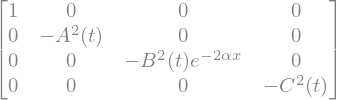

In [55]:
g2(All,All)

In [56]:
Gamma = Christoffel('Gamma', g2)
#Gamma(-All, All, All)   

Rm = Riemann('Rm', g2)
#Rm(-All,All,All,All) 

Ri = Ricci('Ri', g2)
#Ri(All,All)

G = Einstein("G",Ri)

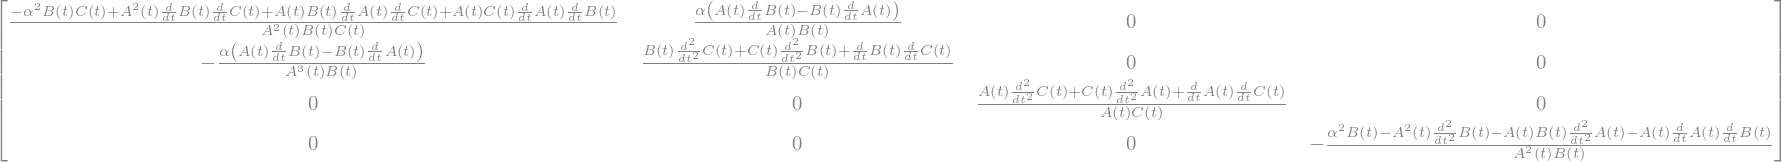

In [57]:
G(-All,All)

Ahora, sabemos que el tensor energía-momento para este tipo de métricas es el de un fluido anisotrópico con la forma

### $$T_{\nu}^{\mu}=diag[1,-w_x,-w_y,-w_z]=[1,-w,-(w-\gamma),-(w+\delta)]\rho$$

In [66]:
gamma,delta,omega,rho = sy.symbols('\\gamma \\delta \\omega \\rho ')

In [73]:
feq1=sy.Eq(G(-1,1),rho)
feq2=sy.Eq(G(-2,2),-omega*rho)
feq3=sy.Eq(G(-3,3),-(omega+delta)*rho)
feq4=sy.Eq(G(-4,4),-(omega+gamma)*rho)
feq5=sy.Eq(G(-1,2),0)

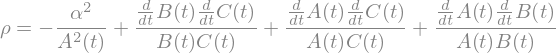

In [68]:
simplify(feq1) #equation (5)

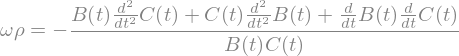

In [69]:
simplify(feq2) #equation (6)

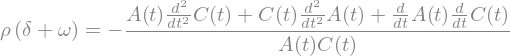

In [70]:
simplify(feq3) #equation (7)

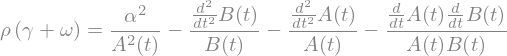

In [71]:
simplify(feq4) #equation (8)

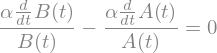

In [75]:
eq9=simplify(feq5) #equation (9)
eq9

## b) Solution of equation (9)

In [76]:
sy.dsolve(eq9,A(t))

## c) Skewness parameter of Bianchi models

In [77]:
C1 = sy.symbols("C_1",real=True)
sol_bianchi=C1*B(t)

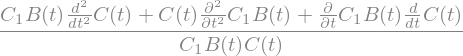

In [84]:
eq7_2=G(-3,3).subs(A(t),sol_bianchi)
eq7_2

Entonces el lado izquierdo de la resta (6)-(7) queda:

In [86]:
sy.simplify(G(-2,2)-eq7_2

Solo reducimos ahora el lado derecho:

In [88]:
sy.simplify(-omega*rho-(-(omega+delta)*rho))

Por lo tanto tenemos que 

### $$\delta \rho = 0 $$

Pero sabemos que $\rho\neq0$ por lo tanto, el parámetro $\delta=0$

# 3. Dynamical Dark Energy

## Preámbulo, ecuación de continuidad y ecuación de friedmann normalizada

### i) Ec. de continuidad

Partimos primero de la ecuación de continuidad para fluidos barotrópicos. Una ecuación diferencial que nos describe el cambio entre dos propiedades macroscópicas de dichos fluidos: la presión y la densidad energética

### $$\dot{\rho}+3\frac{\dot{a}}{a}(\rho+P)=0$$

La forma en que se relacionen las propiedades macroscópicas ($\rho_x, P_x$) de cada componente energética determinará una única ecuación de estado ($w_x \equiv P/\rho$).
Si se sustituye la ecuación de estado en la ecuación de continuidad,

### $$\dot{\rho}+3\frac{\dot{a}}{a}\rho(1+w)=0$$

Tenemos entonces la siguiente ecuación diferencial por resolver:

### $$\int_{\rho_0}^{\rho}\frac{d\rho}{\rho} = -3 \int_{a_0}^{a}\frac{(1+w) }{a} da = 3 \int_{0}^{z}\frac{(1+w) }{1+z} dz$$

Notemos el último cambio de variable: $a_0\equiv1$ es el factor de escala al día de hoy, que equivale a z=0

La solución general es:

### $$\rho(z) = \rho_0 \hspace{0.2cm} \text{exp}\left[3\int^{z}_{0} \frac{(1+w)}{1+z}dz \right]$$

Si $w$ no depende de $z$, \emph{i.e.} $w=\text{cte}$, la solución toma la forma:


### $$\rho(a)=\rho_0\left(\frac{a}{a_0}\right)^{-3(1+w)} = \quad \rho_0 (1+z)^{3(1+w)}$$

#### en el caso de energía oscura dinámica (ecuación de estado no constante), la solución general nos da la evolución temporal de la densidad de cierto fluido.

### ii) Ecuación de Friedmann normalizada

Suponiendo que tenemos tres tipos de fluidos barotrópicos: materia ($w$ cte.), curvatura ($w$ cte.), energía oscura dinámica ($w\neq\text{constante}$), la ecuación de friedmann toma la forma:

### $$E^2(a) \equiv \frac{H^2(a)}{H_0^2} = \Omega_m^0 a^{-3} + \Omega_k^0 a^{-2} + \Omega_{DE}^0 f(a)$$

### $$E^2(z) = \Omega_m^0 (1+z)^{3} + \Omega_k^0 (1+z)^{2} + \Omega_{DE}^0 \hspace{0.2cm} f_{DE}(z) \hspace{5cm} = \Omega_m^0 (1+z)^{3} + \Omega_k^0 (1+z)^{2} + \Omega_{DE}^0 \hspace{0.2cm} \text{exp}\left[3\int^{z}_{0} \frac{(1+w)}{1+z}dz \right] $$

Calculemos las ecuaciones para dos parametrizaciones de energía oscura:

## a) CPL parameterisation 

### $w(a)=w_0+(1-a)w_a$
### $w(z)=w_0+\left(\frac{z}{1+z}\right)w_a$

Usemos la expresión en términos de $z$ y todo se reduce a calcular la integral.

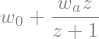

In [185]:
w0, wa, z= symbols('w_0 w_a z')

eq_cpl=w0+(z/(1+z))*wa
eq_cpl

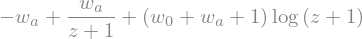

In [189]:
sol_cpl=sy.integrate(((1+eq_cpl)/(1+z)),(z,0,z))
sol_cpl

Veamos que los primeros dos términos se reducen a:

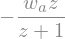

In [177]:
simplify(-wa+(wa/(z+1)))

Aplicando la exponencial a la integral:

In [188]:
sy.exp(3*sol_cpl)

Por lo que tendremos la respuesta:

###  $$E^2(z) = \Omega_m^0 (1+z)^{3} + \Omega_k^0 (1+z)^{2} + \Omega_{DE}^0 \hspace{0.2cm} (1+z)^{3(w_o+w_a+1)} e^{-3w_a z/1+z} $$

Con $\Omega_{DE}^0=1-\Omega_m^0-\Omega_k^0$

Grafiquemos

In [233]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import scipy.integrate
sp_int=scipy.integrate

c_const = sp.constants.c*1e-3


# Contenido energético al día de hoy y constantes de Hubble 
OmR = 1e-4 
OmM = 0.3
OmK = -0.01
OmDE = 1-(OmM+OmK)
H0 = 68                  # km/s/Mpc

In [234]:
# PARAMETRIZACION CPL

# Parametro de Hubble normalizado E(z) = H(z)/H_0
def Hz_CPL(z,w_0,w_a):
    Hz = H0*np.sqrt(OmR*(1+z)**4+OmM*(1+z)**3 + OmK*(1+z)**2 + OmDE*(1+z)**(3*(w_0+w_a+1)*np.exp(-3*w_a*z/1+z)))
    return Hz

# R function:
R0 = 1/(H0*np.sqrt(np.abs(OmK)))

# comoving distance
def Cd(z,w_0,w_a):
    chi = lambda z: (c_const/R0)*(1/Hz_CPL(z,w_0,w_a))
    d1 = sp_int.quad(chi,0.,z)[0]
    return d1
Cd = np.vectorize(Cd)

# luminosity distance
def Ld(z,w_0,w_a):
    d2 = (1+z)*Cd(z,w_0,w_a)
    return d2

# angular diameter distance
def ADd(z,w_0,w_a):
    d3 = Cd(z,w_0,w_a)/(1+z)
    return d3

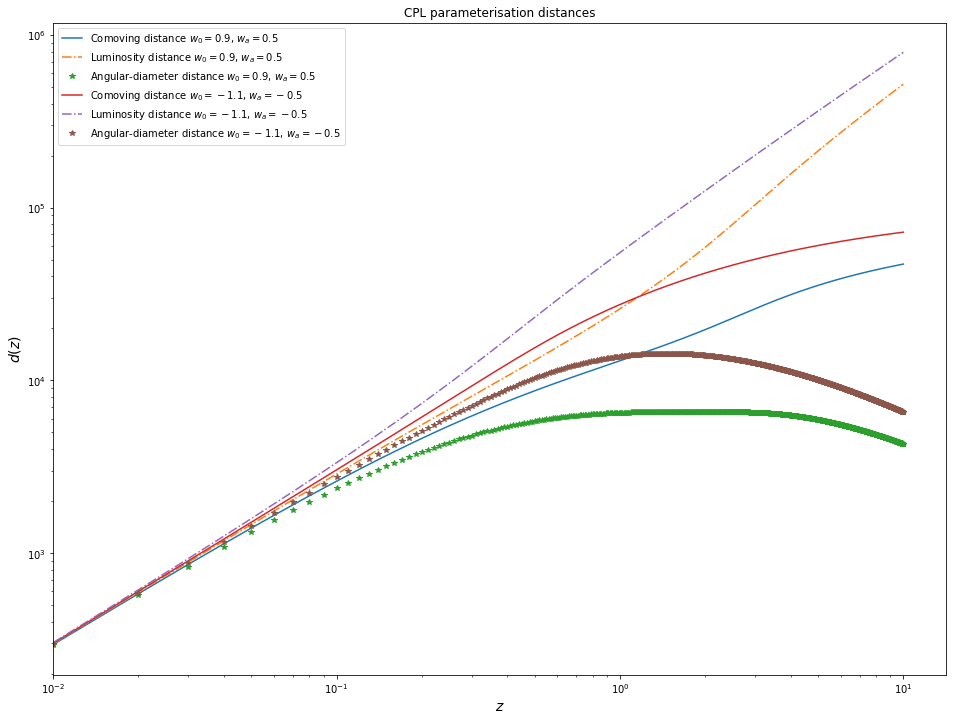

In [235]:
z_range = np.arange(0.,10.,0.01)

fig, ax = plt.subplots(figsize=(16,12))

ax.plot(z_range,Cd(z_range,w_0=0.9,w_a=0.5),'-',label='Comoving distance $w_0=0.9$, $w_a=0.5$')
ax.plot(z_range,Ld(z_range,w_0=0.9,w_a=0.5),'-.',label='Luminosity distance $w_0=0.9$, $w_a=0.5$')
ax.plot(z_range,ADd(z_range,w_0=0.9,w_a=0.5),'*',label='Angular-diameter distance $w_0=0.9$, $w_a=0.5$')

ax.plot(z_range,Cd(z_range,w_0=-1.1,w_a=-0.5),'-',label='Comoving distance $w_0=-1.1$, $w_a=-0.5$')
ax.plot(z_range,Ld(z_range,w_0=-1.1,w_a=-0.5),'-.',label='Luminosity distance $w_0=-1.1$, $w_a=-0.5$')
ax.plot(z_range,ADd(z_range,w_0=-1.1,w_a=-0.5),'*',label='Angular-diameter distance $w_0=-1.1$, $w_a=-0.5$')

ax.legend()
ax.set_title(r'CPL parameterisation distances')
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$d(z)$',fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.01)

## b) Other equation of state

### $w(z)=w_0+w_a ln(1+z)$

In [236]:
w0, wa, z= symbols('w_0 w_a z')

eq_other=w0+wa*sy.ln(1+z)
eq_other

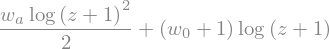

In [237]:
sol_other=sy.integrate(((1+eq_other)/(1+z)),(z,0,z))
sol_other

In [238]:
sy.exp(3*sol_other)

Por lo que tendremos la respuesta:

###  $$E^2(z) = \Omega_m^0 (1+z)^{3} + \Omega_k^0 (1+z)^{2} + \Omega_{DE}^0 \hspace{0.2cm} (1+z)^{2+3(w_0+1)} e^{-3w_a/2} $$


Con $\Omega_{DE}^0=1-\Omega_m^0-\Omega_k^0$

Grafiquemos

In [239]:
# PARAMETRIZACION other

# Parametro de Hubble normalizado E(z) = H(z)/H_0
def Hz_other(z,w_0,w_a):
    Hz = H0*np.sqrt(OmR*(1+z)**4+OmM*(1+z)**3 + OmK*(1+z)**2 + OmDE*(1+z)**(2+(3*(w_0+1))*np.exp(-3*w_a/2)))
    return Hz

# R function:
R0 = 1/(H0*np.sqrt(np.abs(OmK)))

# comoving distance
def Cd_other(z,w_0,w_a):
    chi = lambda z: (c_const/R0)*(1/Hz_other(z,w_0,w_a))
    d1 = sp_int.quad(chi,0.,z)[0]
    return d1
Cd_other = np.vectorize(Cd_other)

# luminosity distance
def Ld_other(z,w_0,w_a):
    d2 = (1+z)*Cd_other(z,w_0,w_a)
    return d2

# angular diameter distance
def ADd_other(z,w_0,w_a):
    d3 = Cd_other(z,w_0,w_a)/(1+z)
    return d3

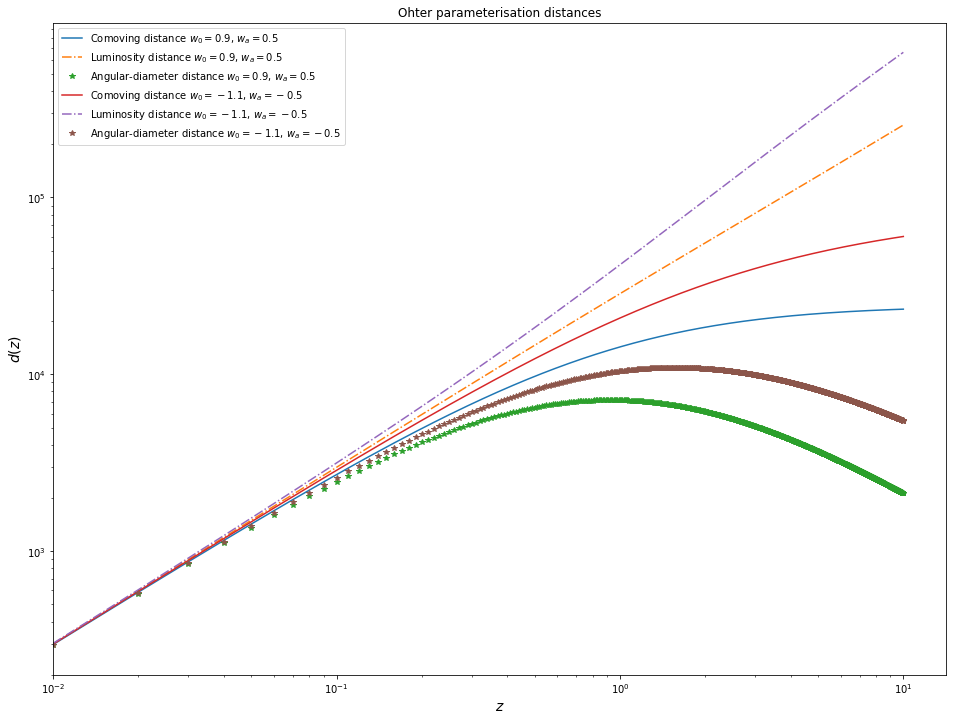

In [240]:
z_range = np.arange(0.,10.,0.01)

fig, ax = plt.subplots(figsize=(16,12))

ax.plot(z_range,Cd_other(z_range,w_0=0.9,w_a=0.5),'-',label='Comoving distance $w_0=0.9$, $w_a=0.5$')
ax.plot(z_range,Ld_other(z_range,w_0=0.9,w_a=0.5),'-.',label='Luminosity distance $w_0=0.9$, $w_a=0.5$')
ax.plot(z_range,ADd_other(z_range,w_0=0.9,w_a=0.5),'*',label='Angular-diameter distance $w_0=0.9$, $w_a=0.5$')

ax.plot(z_range,Cd_other(z_range,w_0=-1.1,w_a=-0.5),'-',label='Comoving distance $w_0=-1.1$, $w_a=-0.5$')
ax.plot(z_range,Ld_other(z_range,w_0=-1.1,w_a=-0.5),'-.',label='Luminosity distance $w_0=-1.1$, $w_a=-0.5$')
ax.plot(z_range,ADd_other(z_range,w_0=-1.1,w_a=-0.5),'*',label='Angular-diameter distance $w_0=-1.1$, $w_a=-0.5$')

ax.legend()
ax.set_title(r'Ohter parameterisation distances')
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$d(z)$',fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.01)

# 4. Polynomial-CDM model

In [90]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import scipy.integrate
sp_int=scipy.integrate

c_const = sp.constants.c*1e-3


# Contenido energético al día de hoy y constantes de Hubble 
OmR = 1e-4 
OmM = 0.3
OmK = -0.01
OmDE = 1-(OmM+OmK)
H0 = 68           

In [91]:
def E_hubble(z,Om0,Omk, Om1, Om2):
    E_H=1/np.sqrt(Om0*(1+z)**3 + (Om1+Omk)*(1+z)**2 + Om2*(1+z)+ (1 - Om0 - Om1 - Om2 - Omk))
    return E_H

In [95]:
def d_c(z,Om0=0.3,Omk = -0.01, Om1 = 0.2, Om2 = -0.2):
    dc = []
    for i in z:
        dc.append(sp_int.quad(E_hubble,0.,i,args=(Om0,Omk,Om1,Om2))[0])
    return np.array(dc)
def d_L(z,Om0=0.3,Omk = -0.01, Om1 = 0.2, Om2 = -0.2):
    return (1+z)*d_c(z,Om1=Om1,Om2=Om2)
def d_A(z,Om0=0.3,Omk = -0.01, Om1 = 0.2, Om2 = -0.2):
    return d_c(z,Om1=Om1,Om2=Om2)/(1+z)

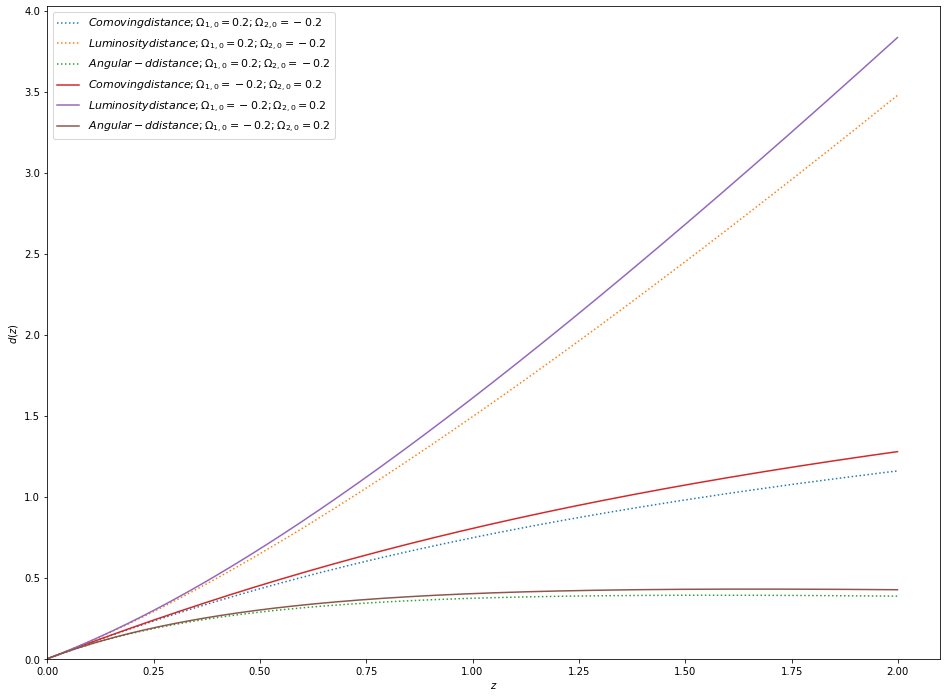

In [100]:
z_range2 = np.arange(0,2,0.001)

fig, ax = plt.subplots(figsize=(16,12))

ax.plot(z,d_c(z_range2,Om1=0.2,Om2=-0.2),ls=":",label="$Comoving distance; \\Omega_{1,0} = 0.2; \\Omega_{2,0} = -0.2$")
ax.plot(z,d_L(z_range2,Om1=0.2,Om2=-0.2),ls=":",label="$Luminosity distance;\\Omega_{1,0} = 0.2; \\Omega_{2,0} = -0.2$")
ax.plot(z,d_A(z_range2,Om1=0.2,Om2=-0.2),ls=":",label="$Angular-d distance;\\Omega_{1,0} = 0.2; \\Omega_{2,0} = -0.2$")
ax.plot(z,d_c(z_range2,Om1=-0.2,Om2=0.2),ls="-",label="$Comoving distance;\\Omega_{1,0} = -0.2; \\Omega_{2,0} = 0.2$")
ax.plot(z,d_L(z_range2,Om1=-0.2,Om2=0.2),ls="-",label="$Luminosity distance;\\Omega_{1,0} = -0.2; \\Omega_{2,0} = 0.2$")
ax.plot(z,d_A(z_range2,Om1=-0.2,Om2=0.2),ls="-",label="$Angular-d distance;\\Omega_{1,0} = -0.2; \\Omega_{2,0} = 0.2$")

plt.ylabel("$d(z)$")
plt.xlabel("$z$")
plt.legend(fontsize=11)
plt.xlim(0,)
plt.ylim(0,)
plt.show()

# 5. Action of massive scalar field

Se entrega a mano